# ESSAIS:

Le clustering est une méthode d’apprentissage non supervisé. Il s'agit d'exploiter l'information disponible pour regrouper des observations qui se ressemblent.

L'objectif est de créer des clusters d'observations pour lesquelles :

au sein de chaque cluster, les observations sont homogènes (variance intra-cluster minimale) les clusters ont des profils hétérogènes, c'est-à-dire qu'ils se distinguent les uns des autres (variance inter-cluster maximale) En Machine Learning , les méthodes de clustering sont très utilisées pour faire de la recommandation. En faisant, par exemple, des classes homogènes de consommateurs, il est plus facile d'identifier et de cibler des comportements propres à chaque classe de consommateurs.

Le WCSS (Within-Cluster Sum of Squares) mesure la somme des distances au carré de chaque point par rapport à son centre de cluster. En d'autres termes, il mesure la variance totale des données dans chaque cluster. Plus le WCSS est faible, plus les clusters sont compacts et homogènes, ce qui est considéré comme une bonne qualité de clustering.
L'analyse de silhouette peut être utilisée pour étudier la distance de séparation entre les clusters résultants. Le diagramme de silhouette affiche une mesure de la proximité de chaque point d'un cluster avec les points des clusters voisins et fournit ainsi un moyen d'évaluer visuellement des paramètres tels que le nombre de clusters. Cette mesure a une plage de [-1, 1]. Les coefficients de silhouette (comme ces valeurs sont appelées) proches de +1 indiquent que l'échantillon est éloigné des grappes voisines. Une valeur de 0 indique que l'échantillon est sur ou très proche de la limite de décision entre deux clusters voisins et des valeurs négatives indiquent que ces échantillons ont peut-être été affectés au mauvais cluster.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import time
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from matplotlib.collections import LineCollection
from sklearn.manifold import TSNE
import matplotlib.cm as cm
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from matplotlib import offsetbox
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
from sklearn.compose import ColumnTransformer, make_column_transformer
from scipy.spatial.distance import cdist
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.cluster.hierarchy import ward, fcluster
from sklearn.preprocessing import FunctionTransformer

In [78]:
clients = pd.read_csv('clients.csv')
clients

,customer_unique_id,Recence,Frequence,Montant,review_score,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,111.0,1,141.90,5.0,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114.0,1,27.19,4.0,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,536.0,1,86.22,3.0,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,320.0,1,43.62,4.0,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,287.0,1,196.89,5.0,2017-11-14 19:45:42
...,...,...,...,...,...,...
92750,fffcf5a5ff07b0908bd4e2dbc735a684,446.0,1,4134.84,5.0,2017-06-08 21:00:36
92751,fffea47cd6d3cc0a88bd621562a9d061,261.0,1,84.58,4.0,2017-12-10 20:07:56
92752,ffff371b4d645b6ecea244b27531430a,567.0,1,112.46,5.0,2017-02-07 15:49:16
92753,ffff5962728ec6157033ef9805bacc48,118.0,1,133.69,5.0,2018-05-02 15:17:41


In [3]:
clients_flt = clients.select_dtypes(include=["float"])

In [4]:
client_rfm = clients[["Frequence","Recence","Montant"]]

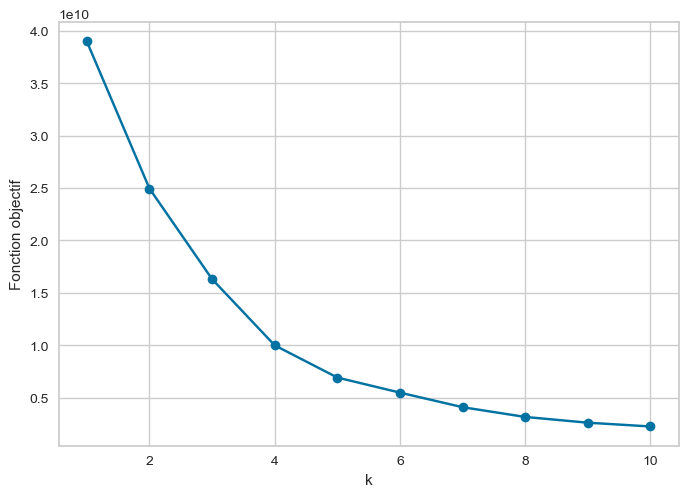

In [5]:
# méthode du coude
x = np.zeros(10)
y = np.zeros(10)
for k in range(x.shape[0]):
    kmeans = KMeans(n_clusters=k+1, random_state = 1)
    kmeans.fit(clients_flt)
    y[k] = kmeans.inertia_
    x[k] = k+1

plt.xlabel('k')
plt.ylabel('Fonction objectif')
plt.plot(x, y, 'o-')
plt.show()

# Dataframe sans review_score

In [6]:
X = client_rfm
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [7]:
# Test de différentes valeurs de k et calcul des scores silhouette et WCSS

scores = []
wcss = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_norm)
    labels = kmeans.labels_
    score = silhouette_score(X_norm, labels)
    scores.append(score)
    wcss.append(kmeans.inertia_)

print(scores)

[0.7743330816165398, 0.5257088907186178, 0.5274839116413509, 0.5313999885060151, 0.47852545745895764, 0.4938201666540526, 0.49465885909760327, 0.5059242336676337]


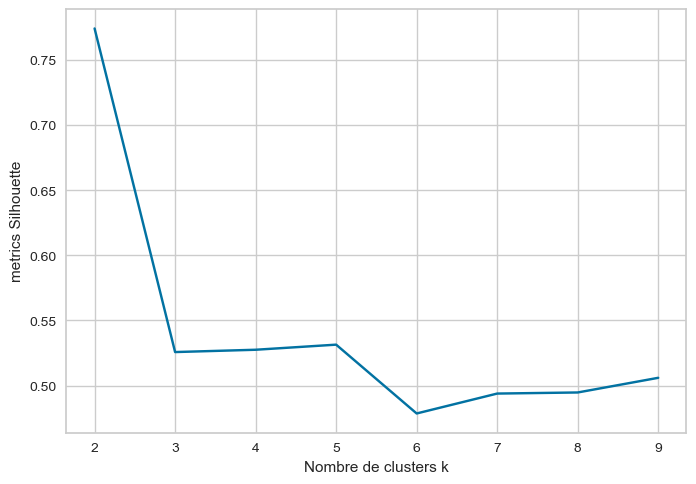

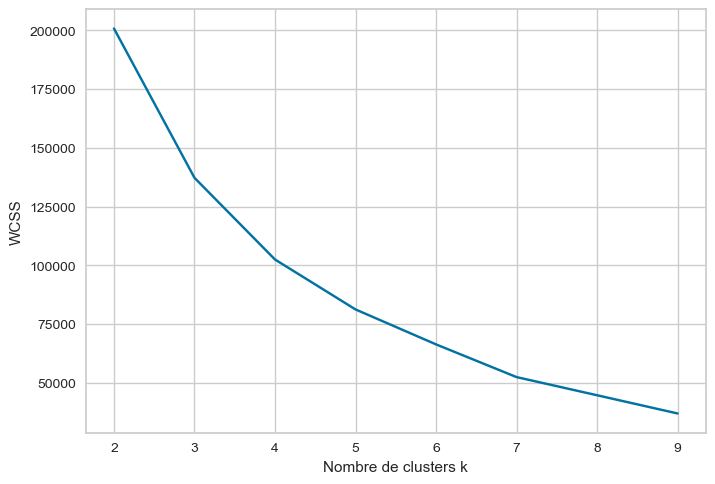

In [8]:
# Tracage des courbes de score silhouette et WCSS en fonction du nombre de clusters k

plt.plot(range(2, 10), scores, 'bx-')
plt.xlabel('Nombre de clusters k')
plt.ylabel('metrics Silhouette')
plt.show()

plt.plot(range(2, 10), wcss, 'bx-')
plt.xlabel('Nombre de clusters k')
plt.ylabel('WCSS')
plt.show()

In [9]:
def s_kmeans(X, rs, k_min, k_max):
    k_means = {}
    scores, wcss, cluster_labels = [], [], []
    
    for k in range(k_min, k_max+1):
        print("Nombre de Cluster:", k)
        kmeans = KMeans(n_clusters=k, init='k-means++',random_state=rs)
        kmeans.fit(X)
        k_means[str(k)]= kmeans
        cluster_labels.append(kmeans.labels_)
        scores.append(silhouette_score(X, cluster_labels[k-k_min]))
        wcss.append(kmeans.inertia_)
    return k_means, cluster_labels, scores, wcss

In [10]:
def labels(df, lbs, k_min, k_max):
    for i in range(k_min, k_max+1):
        col = "Label"+str(i)
        df[col] = lbs[i-k_min]
    return df

In [11]:
def calcul_cluster(df, features, k_min=2, k_max=9, frac=0.5, rs=0):
    if (k_min < 2) or (k_min > k_max):
        raise ValueError("k_min and/or k_max values incorrect.")
    
    df1 = df[features].sample(frac=frac, random_state=rs).copy()
    df_arr = StandardScaler().fit_transform(df1)
    k_means_result, cluster_labels, sil_scores_result, wcss_result = s_kmeans(df_arr, rs=rs, k_min=k_min, k_max=k_max)
    df_labeled = labels(df1, cluster_labels, k_min=k_min, k_max=k_max)
    return df_labeled, k_means_result, sil_scores_result, wcss_result

In [12]:
def label_total(df, features, dict_estimator):
    X = StandardScaler().fit_transform(df[features])
    for k in dict_estimator.keys():
        col_name = "label" + str(k)
        df[col_name] = dict_estimator[k].predict(X)
    return df

In [13]:
rfm_cols = ["Recence", "Frequence", "Montant"]
kmin=2
kmax=6
clients1 = client_rfm.copy()

In [14]:
data_rfm_result, k_means_result, sil_scores_result, wcss_result = calcul_cluster(clients1, rfm_cols, k_min=kmin, k_max=kmax, frac=0.5)

Nombre de Cluster: 2
Nombre de Cluster: 3
Nombre de Cluster: 4
Nombre de Cluster: 5
Nombre de Cluster: 6


In [15]:
clients1 = label_total(client_rfm, rfm_cols, k_means_result )
clients1

C:\Users\33641\AppData\Local\Temp\ipykernel_6936\3516883037.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = dict_estimator[k].predict(X)
C:\Users\33641\AppData\Local\Temp\ipykernel_6936\3516883037.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = dict_estimator[k].predict(X)


,Frequence,Recence,Montant,label2,label3,label4,label5,label6
0,1,111.0,141.90,0,2,0,4,1
1,1,114.0,27.19,0,2,0,4,1
2,1,536.0,86.22,0,0,1,1,5
3,1,320.0,43.62,0,0,1,1,0
4,1,287.0,196.89,0,0,1,1,0
...,...,...,...,...,...,...,...,...
92750,1,446.0,4134.84,0,0,1,2,4
92751,1,261.0,84.58,0,0,1,1,0
92752,1,567.0,112.46,0,0,1,1,5
92753,1,118.0,133.69,0,2,0,4,1


In [16]:
print(clients1.groupby("label2")["Frequence"].count())
print("---------------------------------------------")
print(clients1.groupby("label3")["Frequence"].count())
print("---------------------------------------------")
print(clients1.groupby("label4")["Frequence"].count())
print("---------------------------------------------")
print(clients1.groupby("label5")["Frequence"].count())
print("---------------------------------------------")
print(clients1.groupby("label6")["Frequence"].count())

label2
0    89934
1     2821
Name: Frequence, dtype: int64
---------------------------------------------
label3
0    38303
1     2821
2    51631
Name: Frequence, dtype: int64
---------------------------------------------
label4
0    51581
1    38245
2      153
3     2776
Name: Frequence, dtype: int64
---------------------------------------------
label5
0     2764
1    37975
2      802
3       29
4    51185
Name: Frequence, dtype: int64
---------------------------------------------
label6
0    33829
1    34281
2     2764
3       29
4      774
5    21078
Name: Frequence, dtype: int64


C:\Users\33641\.ipython\python\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\33641\.ipython\python\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


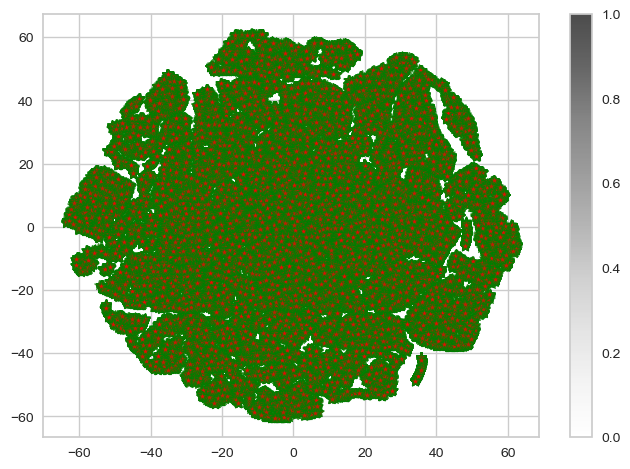

Wall time: 4min 22s


In [17]:
%%time
tsne = TSNE(n_components=2, perplexity = 35)

# Appliquer l'algorithme t-SNE aux données
X_tsne = tsne.fit_transform(clients1)

# Afficher les résultats
plt.scatter(X_tsne[:,0], X_tsne[:,1], marker= "*", alpha=0.7, c='Red', edgecolor='green', linewidth=1)
plt.colorbar()
plt.show()

In [18]:
colors = ["red", "blue", "black", "green", "yellow", "purple"]
colormap =np.array(colors)

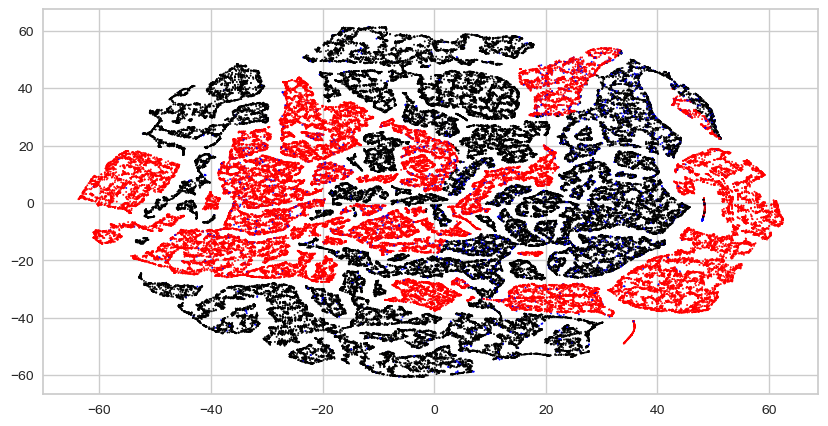

In [19]:
x1 = [X_tsne[i][0] for i in range(X_tsne.shape[0])]
x2 = [X_tsne[i][1] for i in range(X_tsne.shape[0])]

fig = plt.figure(figsize=(10,5))
plt.scatter(x1, x2, s=1, c=colormap[clients1["label3"]])

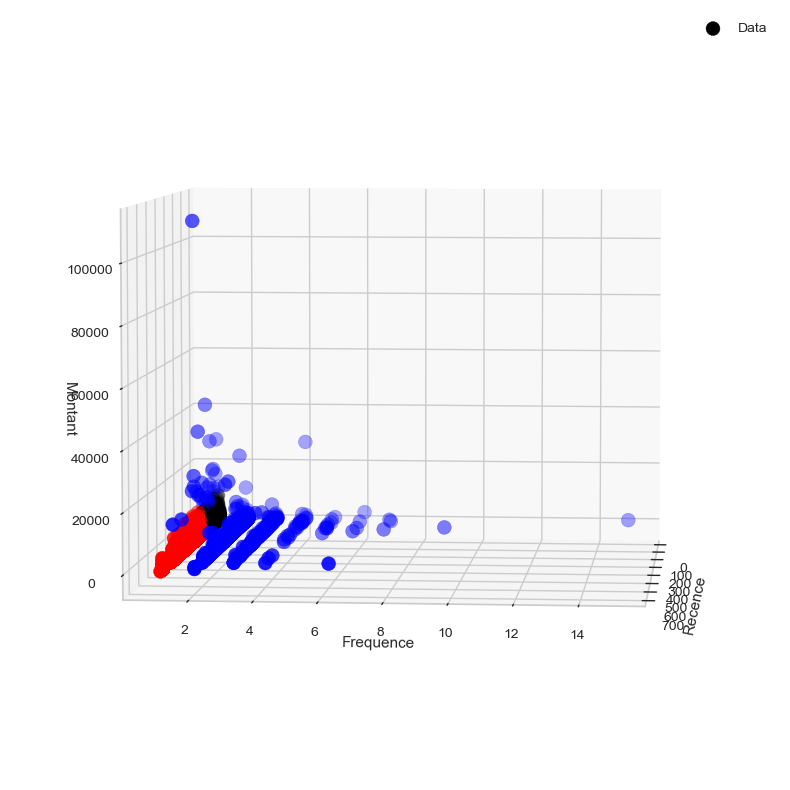

In [20]:
# Le graph indiques que le nombre optimal pour n_clusters est de k=3
k = 3
kmeans = KMeans(n_clusters = k, random_state = 1).fit(clients1)

fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(clients1.Recence, clients1.Frequence, clients1.Montant, c=colormap[clients1["label3"]],s=100)
plt.legend(['Data','Centres des Clusters'])
ax.set_xlabel('Recence')
ax.set_ylabel('Frequence')
ax.set_zlabel('Montant')
ax.view_init(elev=5, azim=5)
plt.show()

Le test de stabilité de K-Means consiste à évaluer la cohérence d'une partition K-Means en effectuant plusieurs exécutions de l'algorithme avec différents paramètres aléatoires d'initialisation. L'une des façons d'évaluer la stabilité de la partition est d'utiliser le score ARI (Adjusted Rand Index).

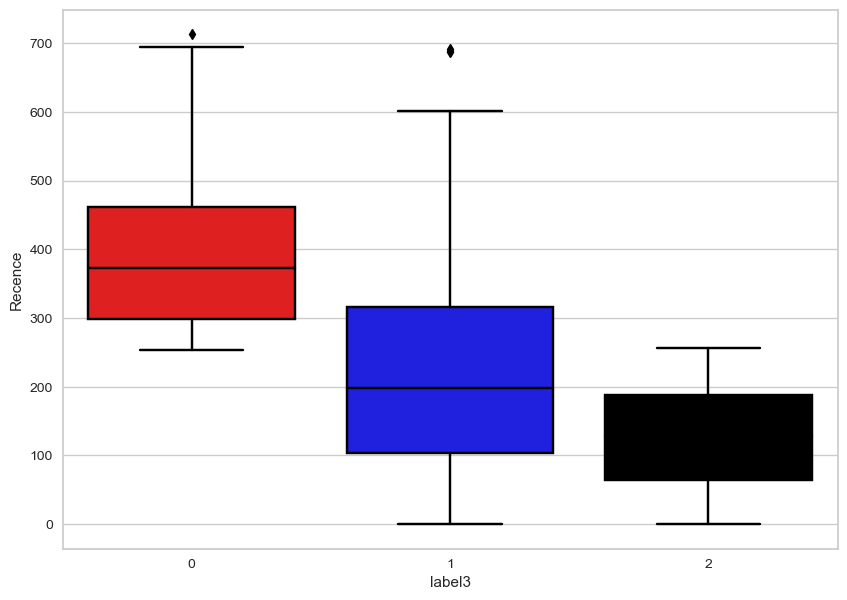

In [21]:
fig = plt.figure(figsize=(10, 7))
sns.boxplot(data= clients1, x="label3", y="Recence", palette=colors)
plt.show()

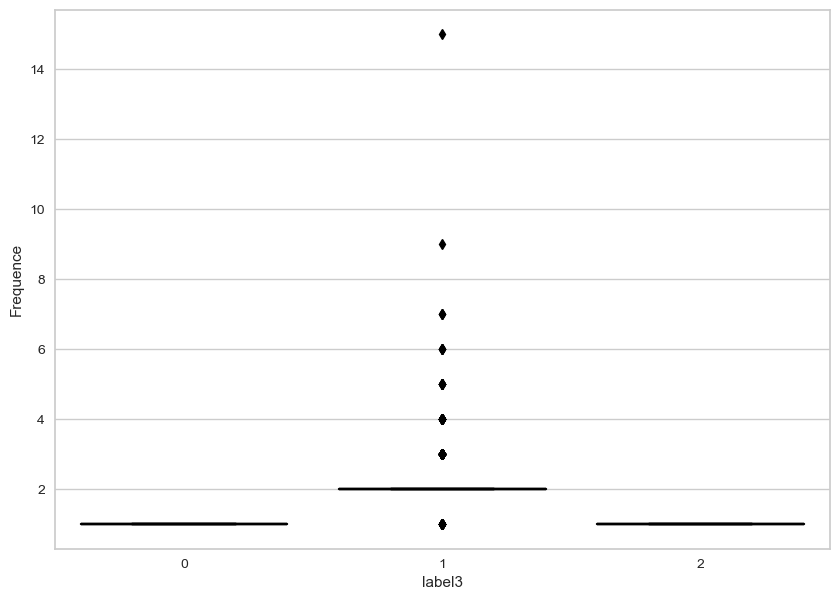

In [22]:
fig = plt.figure(figsize=(10, 7))
sns.boxplot(data= clients1, x="label3", y="Frequence", palette=colors)
plt.show()

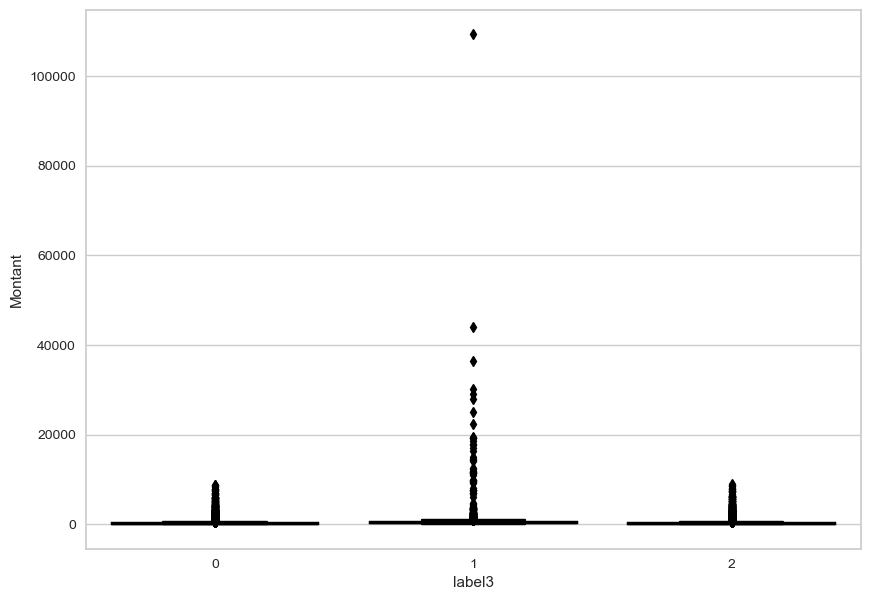

In [23]:
fig = plt.figure(figsize=(10, 7))
sns.boxplot(data= clients1, x="label3", y="Montant", palette=colors)
plt.show()

In [24]:
X = clients1.copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)


labels = kmeans.labels_

clients1['cluster'] = labels

# Affichage de la moyenne des clustering
cluster_means = clients1.groupby('cluster').mean()
print(cluster_means)

         Frequence     Recence     Montant  label2    label3    label4  \
cluster                                                                  
0           1.0000  126.907811  189.778156     0.0  1.999845  0.000039   
1           1.0000  455.007041  232.029461     0.0  0.005222  1.004849   
2           1.0000  298.106813  175.693352     0.0  0.000000  1.000000   
3           2.1028  218.928749  688.827891     1.0  1.000000  2.984048   

           label5    label6  
cluster                      
0        3.984722  0.693868  
1        1.017578  4.982795  
2        1.000177  0.000000  
3        0.050691  2.030131  


In [25]:
def s_kmeans(X, rs, k_min, k_max):
    k_means = {}
    scores, wcss, cluster_labels = [], [], []
    
    for k in range(k_min, k_max+1):
        print("Nombre de Cluster:", k)
        kmeans = KMeans(n_clusters=k, init='k-means++',random_state=rs)
        kmeans.fit(X)
        k_means[str(k)]= kmeans
        cluster_labels.append(kmeans.labels_)
        scores.append(silhouette_score(X, cluster_labels[k-k_min]))
        wcss.append(kmeans.inertia_)
    return k_means, cluster_labels, scores, wcss

def labels(df, lbs, k_min, k_max):
    for i in range(k_min, k_max+1):
        col = "Label"+str(i)
        df[col] = lbs[i-k_min]
    return df

def calcul_cluster(df, features, k_min=2, k_max=9, frac=0.5, rs=0):
    if (k_min < 2) or (k_min > k_max):
        raise ValueError("k_min and/or k_max values incorrect.")
    
    df1 = df[features].sample(frac=frac, random_state=rs).copy()
    df_arr = StandardScaler().fit_transform(df1)
    k_means_result, cluster_labels, sil_scores_result, wcss_result = s_kmeans(df_arr, rs=rs, k_min=k_min, k_max=k_max)
    df_labeled = labels(df1, cluster_labels, k_min=k_min, k_max=k_max)
    return df_labeled, k_means_result, sil_scores_result, wcss_result

def label_total(df, features, dict_estimator):
    X = StandardScaler().fit_transform(df[features])
    for k in dict_estimator.keys():
        col_name = "label" + str(k)
        df[col_name] = dict_estimator[k].predict(X)
    return df

In [26]:
clients2 = client_rfm.copy()
data_rfm_result_1, k_means_result_1, sil_scores_result_1, wcss_result_1 = calcul_cluster(clients2, rfm_cols, k_min=2, k_max=6, frac=0.35)

Nombre de Cluster: 2
Nombre de Cluster: 3
Nombre de Cluster: 4
Nombre de Cluster: 5
Nombre de Cluster: 6


In [27]:
clients2 = label_total(clients2, rfm_cols, k_means_result_1 )
clients2

,Frequence,Recence,Montant,label2,label3,label4,label5,label6,cluster
0,1,111.0,141.90,0,0,0,2,2,0
1,1,114.0,27.19,0,0,0,2,2,0
2,1,536.0,86.22,0,1,2,0,5,1
3,1,320.0,43.62,0,1,2,0,0,2
4,1,287.0,196.89,0,1,2,0,0,2
...,...,...,...,...,...,...,...,...,...
92750,1,446.0,4134.84,0,1,2,3,3,1
92751,1,261.0,84.58,0,1,2,0,0,2
92752,1,567.0,112.46,0,1,2,0,5,1
92753,1,118.0,133.69,0,0,0,2,2,0


In [28]:
print("score stabilité label 3:", adjusted_rand_score(clients1["label3"],clients2["label3"]))
print("score stabilité label 4:", adjusted_rand_score(clients1["label4"],clients2["label4"]))
print("score stabilité label 5:", adjusted_rand_score(clients1["label5"],clients2["label5"]))
print("score stabilité label 6:", adjusted_rand_score(clients1["label6"],clients2["label6"]))

score stabilité label 3: 0.9996624280676694
score stabilité label 4: 0.998830097712379
score stabilité label 5: 0.9981622656078168
score stabilité label 6: 0.9907747470845457


Résultat du score de stabilité supérieure à 80% donc les conteneue des clusters ne change pas avec les échantillons d'apprentissage, donc il sont presque totalement identiques.

In [29]:
clients5= clients.copy()
clients_rfm_5 = clients5[["customer_unique_id"]+ rfm_cols].sample(frac=0.1, random_state=10).copy()
ac=StandardScaler().fit_transform(clients_rfm_5[rfm_cols])

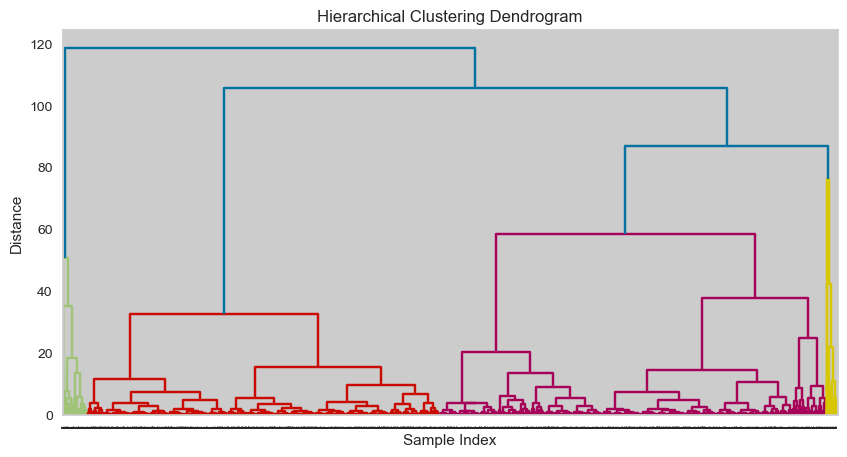

In [30]:
# Compute the linkage matrix using the Ward method
Z = linkage(ac, method='ward')
# Plot the dendrogram
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=0.5,)
plt.show()

# CAH & DBSCAN

CAH (agglomerative clustering) et DBSCAN sont deux techniques de clustering utilisées en science des données.

- L'agglomerative clustering (CAH) est une technique de clustering qui commence par considérer chaque point de données comme un cluster individuel, puis combine les clusters similaires en un seul cluster à chaque étape, jusqu'à ce qu'un seul cluster contenant tous les points soit formé. Cette technique peut être utilisée avec différentes mesures de similarité, telles que la distance euclidienne ou la corrélation. L'avantage de cette méthode est qu'elle ne nécessite pas de spécifier le nombre de clusters à l'avance.


- DBSCAN (Density-Based Spatial Clustering of Applications with Noise) est une technique de clustering qui identifie les clusters en se basant sur la densité des points. Elle trouve des régions de haute densité de points et les considère comme des clusters, tout en considérant les points isolés comme du bruit. Cette méthode peut être utilisée avec différents paramètres, tels que le rayon de la région de densité et le nombre minimum de points requis pour considérer une région comme un cluster. L'avantage de cette méthode est qu'elle peut identifier des formes complexes de clusters et est résistante au bruit.

Pour l'algorithme DBSCAN, il faut déterminer 2 paramètres:

min_samples : le plus petit nombre de points requis pour former un cluster.

eps (epsilon) : la distance maximale entre deux points appartenant à un même cluster.
Pour le paramètre eps, nous allons le déterminer en calculant la distance moyenne entre chaque point et ses plus proches voisins à l'aide de NearestNeighbors.

In [31]:
ac.shape

(9276, 3)

In [32]:
k_means_result['3']

KMeans(n_clusters=3, random_state=0)

In [33]:
#CAH clustering
cah = AgglomerativeClustering(n_clusters=4)
cah_pred = cah.fit_predict(ac)
cah_pred.shape

(9276,)

In [34]:
from scipy.cluster.hierarchy import fcluster

# Déterminer la coupure à partir du dendrogramme
t = 6
clusters = fcluster(Z, t=t, criterion='maxclust')
clusters

array([4, 4, 4, ..., 4, 3, 2], dtype=int32)

In [35]:
np.random.seed(42)
n_samples = 10000
n_rows = ac.shape[0]
indices = np.random.permutation(n_rows)[:n_samples]
indices = np.sort(indices)
ac_reduced = ac[indices]

In [36]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(ac_reduced)
distances, indices = nbrs.kneighbors(ac_reduced)

In [37]:
distances.shape

(9276, 10)

In [38]:
distances_mean = np.mean(distances, axis=1)

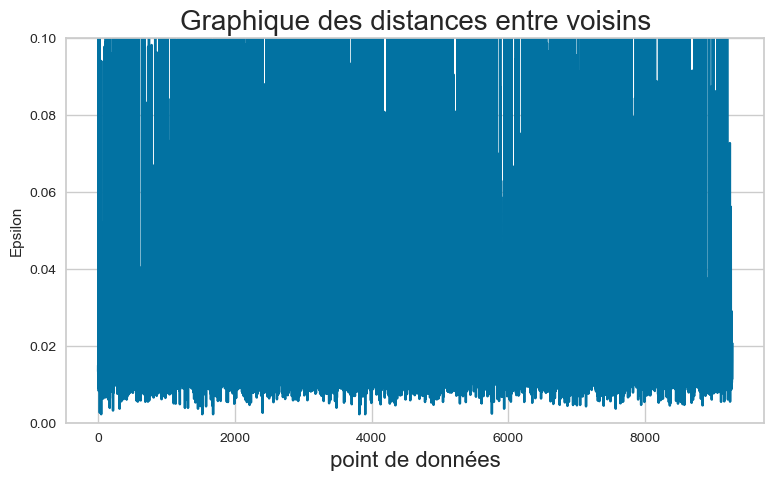

In [39]:
#Tracé des résultats
distances = np.sort(distances, axis=0)
#distances = distances[:,1]
plt.figure(figsize=(9,5))
plt.plot(distances_mean)
plt.ylim([0, 0.1])
plt.title('Graphique des distances entre voisins',fontsize=20)
plt.xlabel('point de données',fontsize=16)
plt.ylabel('Epsilon')
plt.show()

In [40]:
# DBSCAN clustering
y_pred = DBSCAN(eps = 0.05, min_samples=15).fit_predict(ac)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
y_pred.max()

7

In [42]:
np.unique(y_pred)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64)

In [43]:
np.unique(y_pred, return_counts = True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64),
 array([1924, 7202,   38,   33,   12,   20,   19,   16,   12], dtype=int64))

In [44]:
adjusted_rand_score(cah_pred,k_means_result['3'].predict(ac))
print("score ARI entre CAH et Kmeans =",adjusted_rand_score(cah_pred,k_means_result['3'].predict(ac)))

score ARI entre CAH et Kmeans = 0.6544677391655238


ils sont compatibles

Un ARI négatif indique que l'accord est inférieur à ce qui est attendu d'un résultat aléatoire. Cela signifie que les résultats sont « orthogonaux » ou « complémentaires » dans une certaine mesure.



# Dataframe avec review_score

In [45]:
# Dataframe avec review_score
y = clients_flt
scaler = StandardScaler()
X_norm = scaler.fit_transform(y)

In [46]:
# Test de différentes valeurs de k et calcul des scores silhouette et WCSS

scores = []
wcss = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_norm)
    labels = kmeans.labels_
    score = silhouette_score(X_norm, labels)
    scores.append(score)
    wcss.append(kmeans.inertia_)

print(scores)

[0.4531763167942488, 0.4368417771173364, 0.43992435115260586, 0.44333866004943057, 0.45062319769511455, 0.3796129476841236, 0.38672341693111484, 0.3978037173695279]


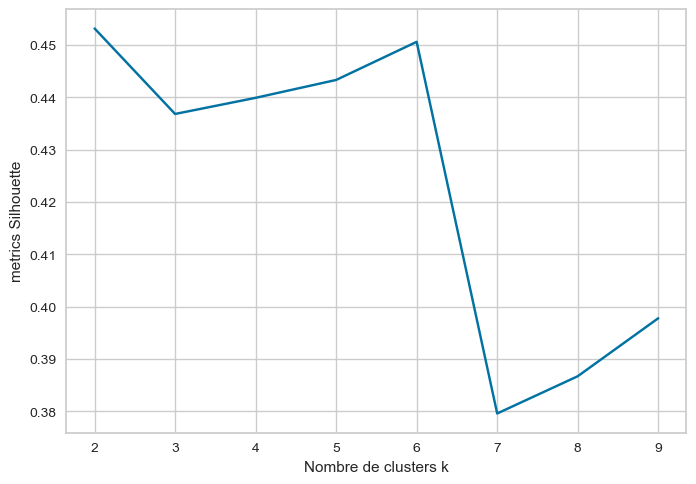

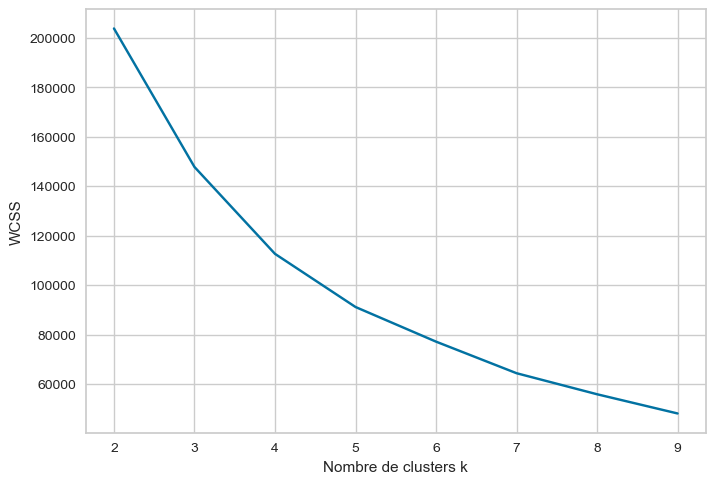

In [47]:
# Tracage des courbes de score silhouette et WCSS en fonction du nombre de clusters k

plt.plot(range(2, 10), scores, 'bx-')
plt.xlabel('Nombre de clusters k')
plt.ylabel('metrics Silhouette')
plt.show()

plt.plot(range(2, 10), wcss, 'bx-')
plt.xlabel('Nombre de clusters k')
plt.ylabel('WCSS')
plt.show()

In [48]:
def label(df, lbs, k_min, k_max):
    for i in range(k_min, k_max+1):
        col = "Label"+str(i)
        df[col] = lbs[i-k_min]
    return df

def calcul_cluster_score(df, features, k_min=2, k_max=9, frac=0.5, rs=0):
    if (k_min < 2) or (k_min > k_max):
        raise ValueError("k_min and/or k_max values incorrect.")
    
    df1 = df[features].sample(frac=frac, random_state=rs).copy()
    df_arr = StandardScaler().fit_transform(df1)
    k_means_r, cluster_r, sil_scores_r, wcss_r = s_kmeans(df_arr, rs=rs, k_min=k_min, k_max=k_max)
    df_labeled = label(df1, cluster_r, k_min=k_min, k_max=k_max)
    return df_labeled, k_means_r, sil_scores_r, wcss_r

In [49]:
score_cols = ["Frequence","Recence", "Montant", "review_score"]
kmin=2
kmax=6
clients3 = clients[["Frequence","Recence", "Montant", "review_score"]]

In [50]:
data_score, k_means_score, sil_scores_score, wcss_score = calcul_cluster_score(clients3, score_cols, k_min=kmin, k_max=kmax, frac=0.5)

Nombre de Cluster: 2
Nombre de Cluster: 3
Nombre de Cluster: 4
Nombre de Cluster: 5
Nombre de Cluster: 6


In [51]:
clients3 = label_total(clients[["Frequence","Recence", "Montant", "review_score"]], score_cols, k_means_score )
clients3

C:\Users\33641\AppData\Local\Temp\ipykernel_6936\2361244894.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = dict_estimator[k].predict(X)


,Frequence,Recence,Montant,review_score,label2,label3,label4,label5,label6
0,1,111.0,141.90,5.0,0,1,1,1,2
1,1,114.0,27.19,4.0,0,1,1,1,2
2,1,536.0,86.22,3.0,0,0,0,0,1
3,1,320.0,43.62,4.0,0,1,0,0,1
4,1,287.0,196.89,5.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
92750,1,446.0,4134.84,5.0,0,1,0,0,5
92751,1,261.0,84.58,4.0,0,1,0,0,1
92752,1,567.0,112.46,5.0,0,1,0,0,1
92753,1,118.0,133.69,5.0,0,1,1,1,2


In [52]:
print(clients3.groupby("label2")["Frequence"].count())
print("---------------------------------------------")
print(clients3.groupby("label3")["Frequence"].count())
print("---------------------------------------------")
print(clients3.groupby("label4")["Frequence"].count())
print("---------------------------------------------")
print(clients3.groupby("label5")["Frequence"].count())
print("---------------------------------------------")
print(clients3.groupby("label6")["Frequence"].count())

label2
0    89934
1     2821
Name: Frequence, dtype: int64
---------------------------------------------
label3
0    19024
1    70915
2     2816
Name: Frequence, dtype: int64
---------------------------------------------
label4
0    32110
1    41963
2     2812
3    15870
Name: Frequence, dtype: int64
---------------------------------------------
label5
0    32049
1    41833
2     2776
3    15951
4      146
Name: Frequence, dtype: int64
---------------------------------------------
label6
0    15812
1    31892
2    41583
3     2763
4       28
5      677
Name: Frequence, dtype: int64


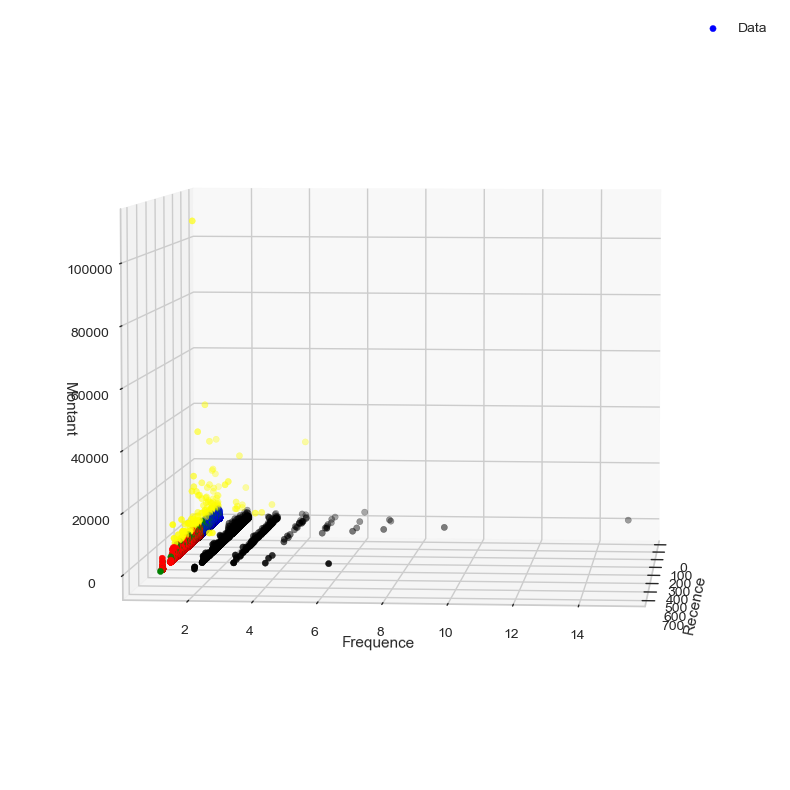

In [53]:
# Calculate the KMeans clusters
colormap = np.array(["red", "blue", "black", "green", "yellow", "purple"])

df_plot = clients3

# Create the 3D plot
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the points with the size and color based on the labels and score
ax.scatter(clients3["Recence"], clients3["Frequence"], clients3["Montant"], c=colormap[clients3["label5"]])

# Add a legend for the clusters and the score scale
plt.legend(['Data','Centres des Clusters'])
ax.set_xlabel('Recence')
ax.set_ylabel('Frequence')
ax.set_zlabel('Montant')
ax.view_init(elev=5, azim=5)
plt.show()

C:\Users\33641\.ipython\python\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\33641\.ipython\python\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


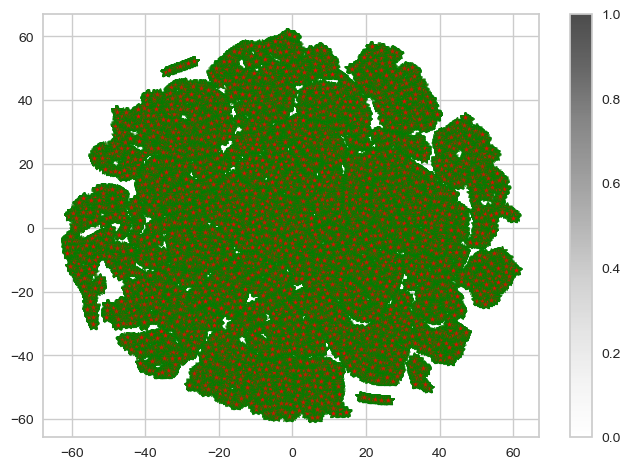

Wall time: 4min 27s


In [54]:
%%time
tsne = TSNE(n_components=2, perplexity = 35)

# Appliquer l'algorithme t-SNE aux données
X_tsne = tsne.fit_transform(clients3)

# Afficher les résultats
plt.scatter(X_tsne[:,0], X_tsne[:,1], marker= "*", alpha=0.7, c='Red', edgecolor='green', linewidth=1)
plt.colorbar()
plt.show()

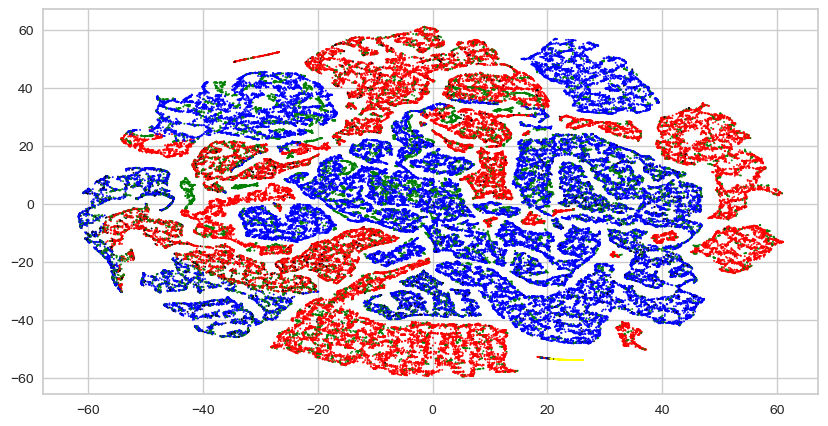

In [55]:
x1 = [X_tsne[i][0] for i in range(X_tsne.shape[0])]
x2 = [X_tsne[i][1] for i in range(X_tsne.shape[0])]

fig = plt.figure(figsize=(10,5))
plt.scatter(x1, x2, s=1, c=colormap[clients3["label5"]])

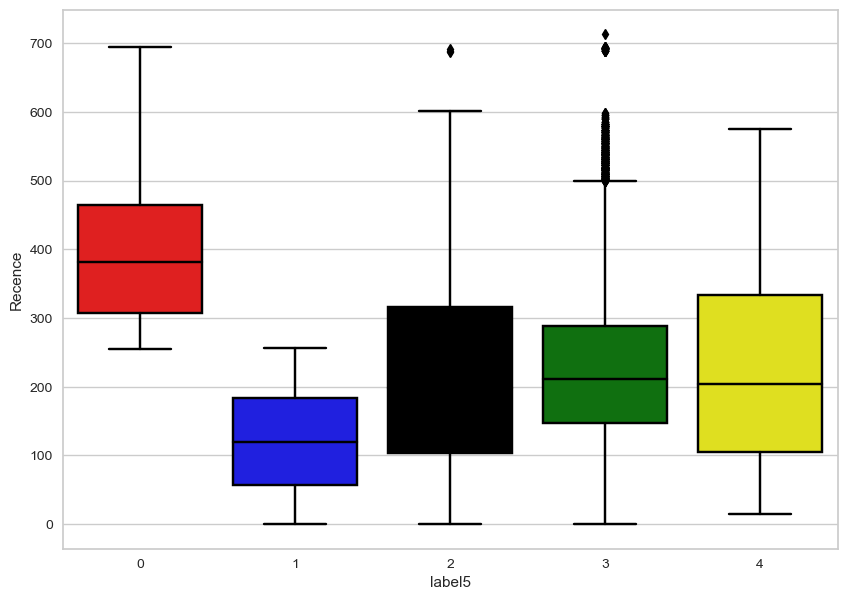

In [56]:
fig = plt.figure(figsize=(10, 7))
sns.boxplot(data= clients3, x="label5", y="Recence", palette=colors)
plt.show()

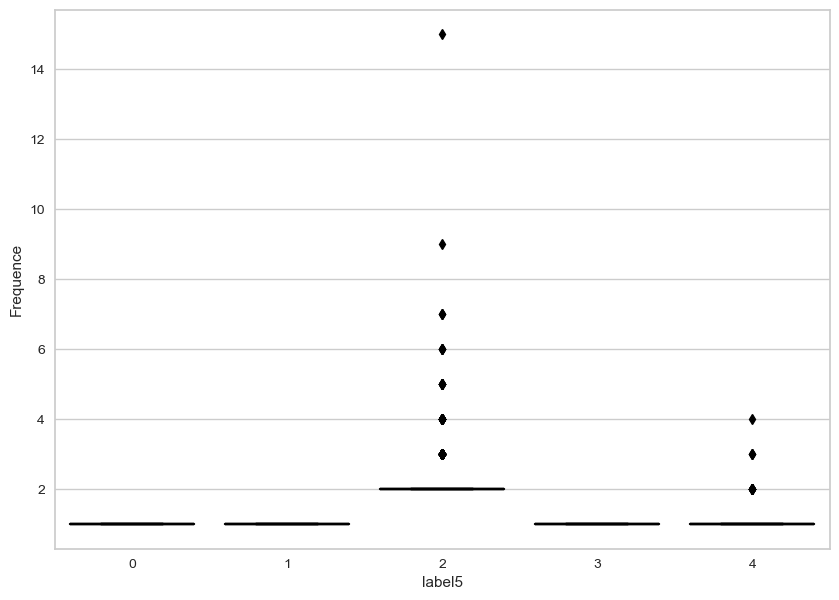

In [57]:
fig = plt.figure(figsize=(10, 7))
sns.boxplot(data= clients3, x="label5", y="Frequence", palette=colors)
plt.show()

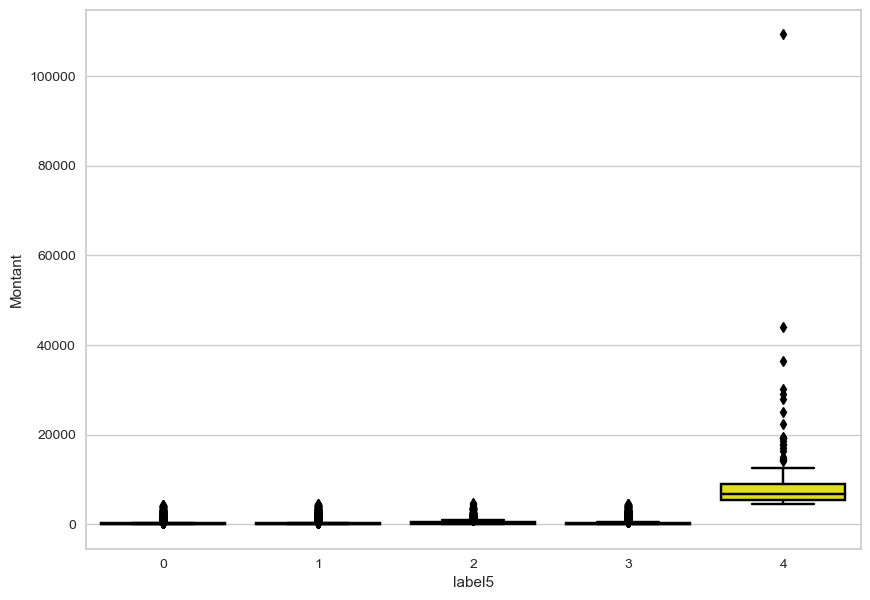

In [58]:
fig = plt.figure(figsize=(10, 7))
sns.boxplot(data= clients3, x="label5", y="Montant", palette=colors)
plt.show()

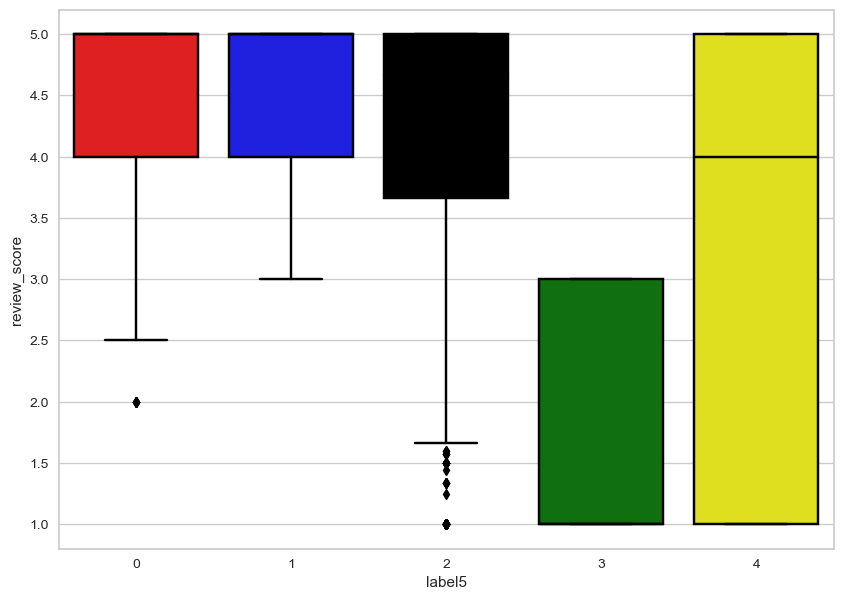

In [59]:
fig = plt.figure(figsize=(10, 7))
sns.boxplot(data= clients3, x="label5", y="review_score", palette=colors)
plt.show()

In [60]:
clients4 = clients[["Frequence","Recence", "Montant", "review_score"]]
data_score_1, k_means_score_1, sil_scores_score_1, wcss_score_1 = calcul_cluster_score(clients[["Frequence","Recence", "Montant", "review_score"]], score_cols, k_min=2, k_max=6, frac=0.35)

Nombre de Cluster: 2
Nombre de Cluster: 3
Nombre de Cluster: 4
Nombre de Cluster: 5
Nombre de Cluster: 6


In [61]:
clients4 = label_total(clients4, score_cols, k_means_score_1 )

C:\Users\33641\AppData\Local\Temp\ipykernel_6936\2361244894.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = dict_estimator[k].predict(X)


# CAH & DBSCAN

In [62]:
clients6= clients.copy()
clients_rfm_6 = clients6[["customer_unique_id"]+ score_cols].sample(frac=0.1, random_state=10).copy()
ac1=StandardScaler().fit_transform(clients_rfm_6[score_cols])

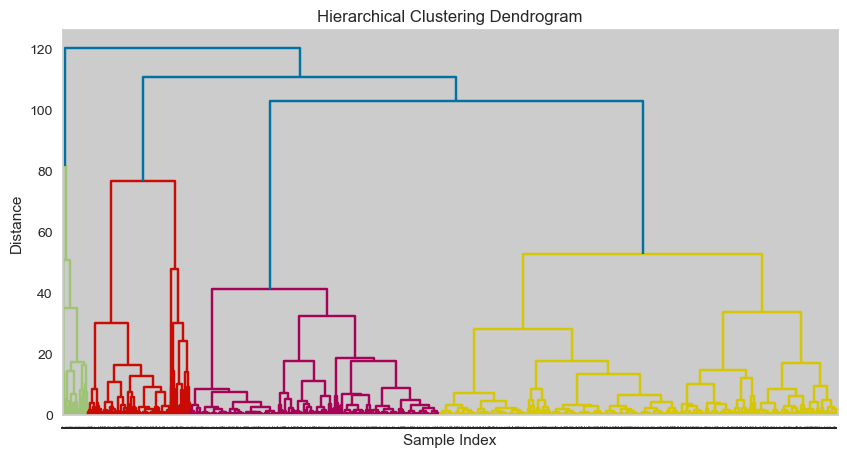

In [63]:
# Compute the linkage matrix using the Ward method
Z = linkage(ac1, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=0.5,)
plt.show()

In [64]:
# DBSCAN clustering
dbscan1 = DBSCAN(eps=0.25, min_samples=20)
dbscan_pred1 = dbscan1.fit_predict(ac1)
dbscan_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)